# CSI 5139F: Assignment 1

Student: Ao Zhang

Student Number: 0300039680

Student Email: azhan085@uottawa.ca

## 1. Getting Started

As indicated in the assignment description, the dataset *Phos_2_0_2MP* is downloaded.

Then, *os* is used for better organizing the folders' paths; *glob* is used to read the image filenames faster. one of the images is plotted for users to checkout how they look like.

Since we start from *uestion 2*, all the required images (non-uniform illumination and uniform illumination) are seperated into two classes. The labels to the corresponding pictures are defined as:

- **non-uniform illumination**: **2**
- **uniform illumination**: **0**

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
import os
import glob
import numpy as np

nonuni_pics = []
uni_pics = []

# read all scene folders
total_folers = glob.glob("../Phos2_0_2MP/Phos2_scene*")

# check out how many folders are there
print("Total number of scenes is: \t \t", len(total_folers))

# read the image filenames according to the category (nonuniform and uniform)
for each_foler in total_folers:
    nonuni_path = os.path.join(each_foler, "*_nonuni_*.png")
    uni_path = os.path.join(each_foler, "*_uni_*.png")
    nonuni_pics += glob.glob(nonuni_path)
    uni_pics += glob.glob(uni_path)

# check out dataset size
print("Number of non-uniform Pictures: \t", len(nonuni_pics))
print("Number of uniform Pictures: \t \t", len(uni_pics))

'''
set classifier as:
1   ->   non-uniform
0   ->   uniform
'''
nonuni_label = 1
uni_label = 0

# define the labels to the corresponding pictures
def DefineLabels(img_names, label, gray = True):
    imgs = []
    labels = []
    for each_img_name in img_names:
        # read images as grayscale
        imgs.append(imread(each_img_name, as_gray = gray))
        labels.append(label)
    imgs = np.array(imgs)
    labels = np.array(labels)
    return imgs, labels

nonuni_imgs, nonuni_labels = DefineLabels(nonuni_pics, nonuni_label)
uni_imgs, uni_labels = DefineLabels(uni_pics, uni_label)

# plot one of the images to check what the image looks like
w, h = nonuni_imgs[0].shape
plt.imshow(nonuni_imgs[0])
plt.show()

Total number of scenes is: 	 	 15
Number of non-uniform Pictures: 	 90
Number of uniform Pictures: 	 	 135


<Figure size 640x480 with 1 Axes>

## 2. Binary Classifier

### 2.1 The way of splitting the images

**For each class**, before sent into the function *train_test_split()*, the images are first shuffled with labels. 

Then, shuffled images and labels are sent to *train_test_split()*. **60%** of the data are selected as **training set**. Then the rest $40\%$ are sent into *train_test_split()* again and split into **validation set** and **test set** equally.

Therefore,
- **60%** of data are selected randomly as **training data**;.
- **20%** of data are selected randomly as **validation data**;
- **20%** of data are selected randomly as **testing data**;

After training sets, validation sets, testing sets are selected seperately from each class, all training sets are **concatenated** to make the **final training set**. Same operation is applied to make **final validation set** and **final testing set**.

*By doing this, we can make sure the proportions of different classes in the datasets keep the same*

In [2]:
from sklearn.model_selection import train_test_split

'''
principle:
    60% selected as training dataset;
    20% selected as validation dataset;
    20% selected as test dataset.
'''
# shuffle images and labels at the same time
def ShuffleData(imgs, labels):
    index = np.arange(len(imgs))
    np.random.shuffle(index)
    return imgs[index], labels[index]

# first shuffle
nonuni_imgs, nonuni_labels = ShuffleData(nonuni_imgs, nonuni_labels)
uni_imgs, uni_labels = ShuffleData(uni_imgs, uni_labels)

# split the data into train, validation, test
def SplitData(imgs, labels, train_size, validation_size):
    X_train, X_rest, Y_train, Y_rest = train_test_split(imgs, labels, \
                                                        test_size = (1 - train_size), random_state=42)
    X_validation, X_test, Y_validation, Y_test = train_test_split(X_rest, Y_rest, \
                                                          test_size = (1 - validation_size), random_state=42)
    return X_train, X_validation, X_test, Y_train, Y_validation, Y_test

# split nonuniform images and labels into 3 sets
nonuni_Xtrain, nonuni_Xvalidation, nonuni_Xtest, nonuni_Ytrain, nonuni_Yvalidation, nonuni_Ytest = \
                                            SplitData(nonuni_imgs, nonuni_labels, 0.6, 0.5)

uni_Xtrain, uni_Xvalidation, uni_Xtest, uni_Ytrain, uni_Yvalidation, uni_Ytest = \
                                            SplitData(uni_imgs, uni_labels, 0.6, 0.5)

# combine all images and labels into one set and shuffle it
def CombineDataAndShuffle(pre_combined_imgs, pre_combined_labels):
    # combine data
    combined_imgs = np.concatenate(pre_combined_imgs, axis = 0)
    combined_labels = np.concatenate(pre_combined_labels, axis = 0)
    # shuffle
    shuffled_imgs, shuffled_labels = ShuffleData(combined_imgs, combined_labels)
    return shuffled_imgs, shuffled_labels

# get pre-combined imgs and labels
X_train_pre, Y_train_pre = [nonuni_Xtrain, uni_Xtrain], [nonuni_Ytrain, uni_Ytrain]
X_validation_pre, Y_validation_pre = [nonuni_Xvalidation, uni_Xvalidation], [nonuni_Yvalidation, uni_Yvalidation]
X_test, Y_test = [nonuni_Xtest, uni_Xtest], [nonuni_Ytest, uni_Ytest]

# second shuffle
X_train, Y_train = CombineDataAndShuffle(X_train_pre, Y_train_pre)
X_validation, Y_validation = CombineDataAndShuffle(X_validation_pre, Y_validation_pre)
X_test, Y_test = CombineDataAndShuffle(X_test, Y_test)

print("Number of data used for training: \t", len(Y_train))
print("Number of data used for validation: \t", len(Y_validation))
print("Number of data used for test: \t \t", len(Y_test))


Number of data used for training: 	 135
Number of data used for validation: 	 45
Number of data used for test: 	 	 45


### 2.2 All metrics

all the metrics, including the confusion matrix, the accuracy, the recall and the precision are derived by the *sklearn* functions and printed as follow.

Validation score: 	 0.9777777777777777
Confusion Matrix: 
 [[27  0]
 [ 2 16]]
Accuracy: 		 0.9555555555555556
Recall: 		 1.0
Precision: 		 0.8888888888888888


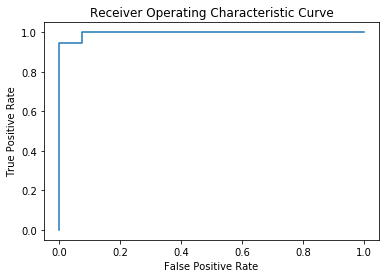

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve

def change_format(data):
    shape = data.shape
    return data.reshape((shape[0], -1))

X_train = change_format(X_train)
X_validation = change_format(X_validation)
X_test = change_format(X_test)

# all parameters not specified are set to their defaults
logistic_regression = LogisticRegression(solver = 'liblinear')

# fit data into model
logistic_regression.fit(X_train, Y_train)

# find out score
score = logistic_regression.score(X_validation, Y_validation)
print("Validation score: \t", score)

# predict labels
Pred_test = logistic_regression.predict(X_test)
Y_score = logistic_regression.decision_function(X_test)

# confusion matrix
confusionmatrix = confusion_matrix(Y_test, Pred_test)

# accuracy
accuracy = accuracy_score(Pred_test, Y_test)

# recall
recall = recall_score(Pred_test, Y_test)

# precision
precision = precision_score(Pred_test, Y_test)

# ROC
fpr, tpr, _ = roc_curve(Y_test, Y_score)

print("Confusion Matrix: \n", confusionmatrix)
print("Accuracy: \t\t", accuracy)
print("Recall: \t\t", recall)
print("Precision: \t\t", precision)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()


## 3. Multiclass Classifier

All images are derived into $3$ groups as the problem requires. Also, as usual, one of the images is plotted for visualizing the dataset.

Total images: 	 	 	 225
Underexposed images: 	 	 60
Overexposed images: 	 	 60
Regular images: 	 	 105


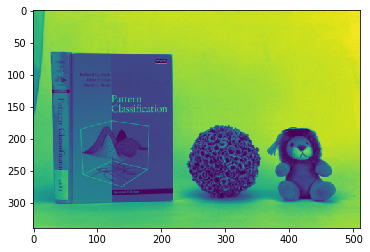

In [4]:
# initialize variables
all_img = []
under_exp_img = []
over_exp_img = []

# read the image filenames according to the classes
for each_foler in total_folers:
    all_path = os.path.join(each_foler, "*.png")
    under_path = os.path.join(each_foler, "*_minus_*.png")
    over_path = os.path.join(each_foler, "*_plus_*.png")
    all_img += glob.glob(all_path)
    under_exp_img += glob.glob(under_path)
    over_exp_img += glob.glob(over_path)

# check the total number of images for further checkout
print("Total images: \t \t \t", len(all_img))

# initial regular images
regular_img = all_img

# remove all images shown in under exposed images
for img_i in under_exp_img:
    regular_img.remove(img_i)

# remove all images shown in over exposed images
for img_j in over_exp_img:
    regular_img.remove(img_j)
    
# check out dataset size
print("Underexposed images: \t \t", len(under_exp_img))
print("Overexposed images: \t \t", len(over_exp_img))
print("Regular images: \t \t", len(regular_img))

# set labels
'''
set classifier as:
0   ->   underexposed
1   ->   overexposed
2   ->   regular
'''
under_label = 0
over_label = 1
regular_label = 2

# define the labels to the corresponding pictures
underexp_imgs, underexp_labels = DefineLabels(under_exp_img, under_label)
overexp_imgs, ovexp_labels = DefineLabels(over_exp_img, over_label)
regular_imgs, regular_labels = DefineLabels(regular_img, regular_label)

# plot one of the images to check what the image looks like
plt.imshow(underexp_imgs[0])
plt.show()


### 3.1 Data Splitting

**Same trick as the last question**, which is images are splitted into training set, validation set and test set with proportion $60\%$, $20\%$ and $20\%$ respectively **in each class**. Then, all training sets, validation sets and test sets are combined together into $3$ sets.

### 3.2 Metrics

The **confusion matrix** and the **accuracy** are printed at the end of the cell.

### 3.3 Brief Conclusion

Since the task is to define whether the image is overexposed or underexposed or regular, the key feature of the images is the pixel contrast.

After observing some results, it is found that the model could tell the differences between $-4EV$, $4EV$ and $0$ exposure easily, but tend to make mistakes in images with $-1EV$, $1EV$ and $0$ exposure.

But also, to be fair, even human beings feel hard to tell the differences between $-1EV$, $1EV$ and $0$ exposure images.

In [5]:
# Build a function here for further usage
def SplitAndMerge(underexp_imgs, underexp_labels, overexp_imgs, 
                  ovexp_labels, regular_imgs, regular_labels):
    # first shuffle
    underexp_imgs, underexp_labels = ShuffleData(underexp_imgs, underexp_labels)
    overexp_imgs, ovexp_labels = ShuffleData(overexp_imgs, ovexp_labels)
    regular_imgs, regular_labels = ShuffleData(regular_imgs, regular_labels)

    # split images and labels into 3 sets
    under_Xtrain, under_Xvalidation, under_Xtest, under_Ytrain, under_Yvalidation, under_Ytest = \
                                                SplitData(underexp_imgs, underexp_labels, 
                                                          0.6, 0.5)

    over_Xtrain, over_Xvalidation, over_Xtest, over_Ytrain, over_Yvalidation, over_Ytest = \
                                                SplitData(overexp_imgs, ovexp_labels, 
                                                          0.6, 0.5)

    regular_Xtrain, regular_Xvalidation, regular_Xtest, regular_Ytrain, regular_Yvalidation, regular_Ytest = \
                                                SplitData(regular_imgs, regular_labels, 
                                                          0.6, 0.5)

    # get pre-combined imgs and labels
    X_train_pre, Y_train_pre = [under_Xtrain, over_Xtrain, regular_Xtrain], [under_Ytrain, over_Ytrain, regular_Ytrain]
    X_validation_pre, Y_validation_pre = [under_Xvalidation, over_Xvalidation, regular_Xvalidation], \
                                        [under_Yvalidation, over_Yvalidation, regular_Yvalidation]
    X_test, Y_test = [under_Xtest, over_Xtest, regular_Xtest], [under_Ytest, over_Ytest, regular_Ytest]

    # second shuffle
    X_train, Y_train = CombineDataAndShuffle(X_train_pre, Y_train_pre)
    X_validation, Y_validation = CombineDataAndShuffle(X_validation_pre, Y_validation_pre)
    X_test, Y_test = CombineDataAndShuffle(X_test, Y_test)
   
    return X_train, Y_train, X_validation, Y_validation, X_test, Y_test

# format data into training set, validation set and test set
X_train_img, Y_train, X_validation_img, Y_validation, X_test_img, Y_test = \
            SplitAndMerge(underexp_imgs, underexp_labels, overexp_imgs, 
                              ovexp_labels, regular_imgs, regular_labels)

# change image from (N, w, h) to (N, -1)
X_train = change_format(X_train_img)
X_validation = change_format(X_validation_img)
X_test = change_format(X_test_img)

# all parameters not specified are set to their defaults
logistic_regression_multi = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# fit data into model
logistic_regression_multi.fit(X_train, Y_train)

# find out score
score = logistic_regression_multi.score(X_validation, Y_validation)

print("Validation score: \t", score)

# build a function for calculating metrics for further usage
def MeticsCalculation(model, X_validation, Y_validation, X_test, Y_test):
    # predict labels
    Pred_test = logistic_regression_multi.predict(X_test)

    # confusion matrix
    confusionmatrix = confusion_matrix(Y_test, Pred_test)

    # accuracy
    accuracy = accuracy_score(Pred_test, Y_test)

    print("Confusion Matrix: \n", confusionmatrix)
    print("Accuracy: \t\t", accuracy)

# calculate all necessary metrics
MeticsCalculation(logistic_regression_multi, X_validation, Y_validation, X_test, Y_test)

Validation score: 	 0.8222222222222222
Confusion Matrix: 
 [[12  0  0]
 [ 0 10  2]
 [ 0  1 20]]
Accuracy: 		 0.9333333333333333


/home/ao/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## 4. Improved Classification of Colour Images

### 4.1 Re-read images as RGB and Build the classifier

First of all, according to the question, images are re-read with RGB channels, then fed into the same model as question $(1.3)$ and named as *logistic_regression_color*.

As we can see, the accuracy of the color image is $0.89$.

In [6]:
"""
Try color images first.
"""
# define the labels to the corresponding pictures
underexp_imgs, underexp_labels = DefineLabels(under_exp_img, under_label, False)
overexp_imgs, overexp_labels = DefineLabels(over_exp_img, over_label, False)
regular_imgs, regular_labels = DefineLabels(regular_img, regular_label, False)

# format data into training set, validation set and test set
X_train_img, Y_train, X_validation_img, Y_validation, X_test_img, Y_test = \
            SplitAndMerge(underexp_imgs, underexp_labels, overexp_imgs, 
                              ovexp_labels, regular_imgs, regular_labels)

# change image from (N, w, h) to (N, -1)
X_train = change_format(X_train_img)
X_validation = change_format(X_validation_img)
X_test = change_format(X_test_img)

# fit data into model
logistic_regression_multi.fit(X_train, Y_train)

# calculate all necessary metrics
MeticsCalculation(logistic_regression_multi, X_validation, Y_validation, 
                  X_test, Y_test)


Confusion Matrix: 
 [[11  0  1]
 [ 1 11  0]
 [ 1  1 19]]
Accuracy: 		 0.9111111111111111


/home/ao/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### 4.2 Histogram Equalization

*First of all*, the most popular method for calculating the exposure is **histogram**, which works perfectly in grayscale images.

For color images, **histogram** could be found in each R, G, or B channel. Then, use **histogram equalization** to stretch out the pixel intensity range, which, in return, improve the contrast in the images.

At the end of cell, an image is plotted before and after the **histogram equalization** processing for visualization.

*Second*, in this section, training data, validation data and test data are processed seperately in order to keey the dataset as the same with $4.1$. This could give us a more intuitive comparison of results.

/home/ao/.local/lib/python3.5/site-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


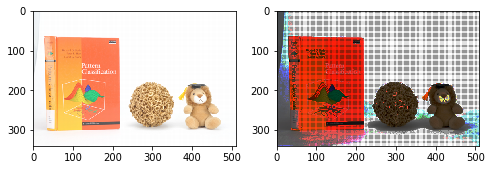

In [7]:
from skimage.exposure import histogram, equalize_hist
from skimage.color import rgb2gray
from tqdm import tqdm

"""
Use histogram equalization to emphasize the contrast of the image content.
"""
def HistogramEqualization(imgs):
    for i in range(len(imgs)):
        img = imgs[i]
        new_img = equalize_hist(img)
        new_img = np.expand_dims(new_img, axis = 0)
        if i == 0:
            new_imgs = new_img
        else:
            new_imgs = np.concatenate([new_imgs, new_img], axis = 0)
    return new_imgs

# apply histogram equalization
X_train_improve_img = HistogramEqualization(X_train_img)
X_validation_improve_img = HistogramEqualization(X_validation_img)
X_test_improve_img = HistogramEqualization(X_test_img)

# change the name of labels for consistency
Y_train_improve = Y_train
Y_validation_improve = Y_validation
Y_test_improve = Y_test

# plot the images to show difference
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(X_train_img[0])
ax2.imshow(X_train_improve_img[0])
plt.show()


### 4.3 Train and Test on the same images

After training and testing on processed dataset, **the accuracy** is improved from $0.89$ to $0.93$.

Since it denpends heavily on the data splitting, same tests are done several times.

As a result, the average accuracy **before histogram equalization** is about $0.85$, and it is about $0.9$ **after histogram equalization** with $5\%$ increase.

Also, the **error in the confusion matrix** is also improved with less errors shown inside the matrix.



In [8]:
"""
Check the influence on the result.
"""
# change image from (N, w, h) to (N, -1)
X_train_improve = change_format(X_train_improve_img)
X_validation_improve = change_format(X_validation_improve_img)
X_test_improve = change_format(X_test_improve_img)

# fit data into model
logistic_regression_multi.fit(X_train_improve, Y_train_improve)

# calculate all necessary metrics
MeticsCalculation(logistic_regression_multi, X_validation_improve, Y_validation_improve, 
                  X_test_improve, Y_test_improve)

Confusion Matrix: 
 [[11  0  1]
 [ 0 12  0]
 [ 1  0 20]]
Accuracy: 		 0.9555555555555556


/home/ao/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### 4.4 An overexposed, an underexposed and a correctly exposed image

Since the question asks to use images out of *Phos2_0_2MP*, dataset *Phos2_0_5MP* is also downloaded in this section.

An overexposed, an underexposed and a correctly exposed image are then randomly selected from the dataset and then feed into the model we improved.

In [9]:
from skimage.transform import resize

all_img = []
under_exp_img = []
over_exp_img = []

# read all scene folders
total_folers = glob.glob("../Phos2_0_5MP/Phos2_scene*")

# read the image filenames according to the classes
for each_foler in total_folers:
    all_path = os.path.join(each_foler, "*.png")
    under_path = os.path.join(each_foler, "*_minus_*.png")
    over_path = os.path.join(each_foler, "*_plus_*.png")
    all_img += glob.glob(all_path)
    under_exp_img += glob.glob(under_path)
    over_exp_img += glob.glob(over_path)
    
# initial regular images
regular_img = all_img

# remove all images shown in under exposed images
for img_i in under_exp_img:
    regular_img.remove(img_i)

# remove all images shown in over exposed images
for img_j in over_exp_img:
    regular_img.remove(img_j)
    
# check out dataset size
under_ori = resize(imread(under_exp_img[np.random.randint(len(under_exp_img))]), (w, h))
over_ori = resize(imread(over_exp_img[np.random.randint(len(over_exp_img))]), (w, h))
regular_ori = resize(imread(regular_img[np.random.randint(len(regular_img))]), (w, h))

# read the images
under_img = np.expand_dims(HistogramEqualization(under_ori), axis = 0)
over_img = np.expand_dims(HistogramEqualization(over_ori), axis = 0)
regular_img = np.expand_dims(HistogramEqualization(regular_ori), axis = 0)

# transfer the format
under_img = change_format(under_img)
over_img = change_format(over_img)
regular_img = change_format(regular_img)

print("done")


done


After translated into strings, the labels are printed on the top of the corresponding images.

prediction: 	 underexposed


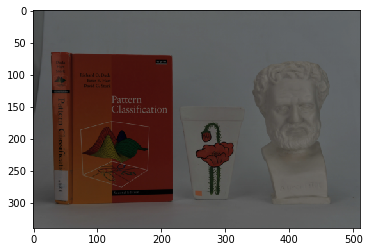

prediction: 	 overexposed


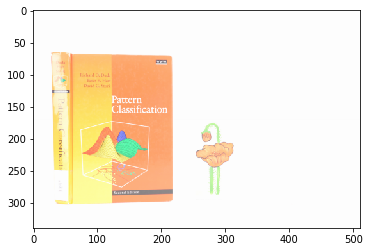

prediction: 	 regular


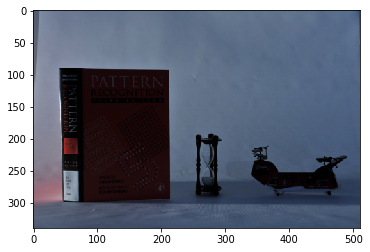

In [10]:
'''
set classifier as:
0   ->   underexposed
1   ->   overexposed
2   ->   regular
'''
def TransferLabel(pred):
    if pred[0] == 0:
        pred = "underexposed"
    elif pred[0] == 1:
        pred = "overexposed"
    elif pred[0] == 2:
        pred = "regular"
    else:
        raise ValueError("not recognized")
    return pred

# use model to predict
under_pred = logistic_regression_multi.predict(under_img)
over_pred = logistic_regression_multi.predict(over_img)
regular_pred = logistic_regression_multi.predict(regular_img)

# transfer labels to readable
under_label = TransferLabel(under_pred)
over_label = TransferLabel(over_pred)
regular_label = TransferLabel(regular_pred)

# plot out
plt.imshow(under_ori)
print("prediction: \t", under_label)
plt.show()
plt.imshow(over_ori)
print("prediction: \t", over_label)
plt.show()
plt.imshow(regular_ori)
print("prediction: \t", regular_label)
plt.show()